# Исследование влияния преобразования изображений документов на качество детекции и распознавания штрих-кодов
- Автор: Кирилл Киселев
- Дата начала: 05.04.2022
- Описание исследования: в наборе данных имеется 205 сканов документов ТОРГ-12 разного качества. На каждом скане имеется штрих-код, который необходимо детектировать и распознать. Тестирование прототипа производилось спрева на "сырых" данных - изображения не подвергались преобразовниям кроме обрезания области детекции. При ттестирования прототипа штрих-код не был обнаружен на 11 документов. Задача исследования подобрать типы преобразований необходимые для распознваваний штрих-кодов на 100% изображений.

## 1. Проблемные изображения

## 2. Загрузка библиотек

In [11]:
import cv2
import numpy as np
import matplotlib as plt
import os
import math
from PIL import Image
from pyzbar import pyzbar

## 3. Глобальные переменные

In [12]:
!pwd

/home/kirillk/PycharmProjects/useful_notebooks


In [13]:
FILE_PATH = '/home/kirillk/datasets/OCR/ocr_test_cases/test_cases/'

### Необходимые функции

In [15]:
def draw_barcode(decoded, image):
    image = cv2.rectangle(image, (decoded.rect.left, decoded.rect.top),
                          (decoded.rect.left + decoded.rect.width, decoded.rect.top + decoded.rect.height),
                          color=(0, 255, 0),
                          thickness=5)
    return image

In [16]:
def decode(image):
    # decodes all barcodes from an image
    decoded_objects = pyzbar.decode(image)
    
    for obj in decoded_objects:
        # draw the barcode
        print(f"Обнаружен штрих-код:\n{obj}")
        image = draw_barcode(obj, image)
        # print barcode type & data
        # print("Тип:", obj.type)
        print("Данные:", obj.data)
        print()

    return len(decoded_objects), image

### Применение Гауссовского блюра на нераспознанные документы

In [14]:
# исходный список нараспознанных документов
bad_barcodes_list = ['038.jpg', '039.jpg', '040.jpg',
                     '041.jpg', '042.jpg', '043.jpg',
                     '044.jpg', '095.jpg', '146.jpg',
                     '157.jpg', '159.jpg']

In [17]:
# список документов с нераспознанным штрих-кодом
bad_barcodes_list_1 = []

In [18]:
for file in bad_barcodes_list:
    print(f'----------------{file}----------------')
    image = cv2.imread(FILE_PATH + file)
    image = cv2.GaussianBlur(image, (7, 7), 0)
    
    bar_code_qty, img = decode(image)
    if bar_code_qty == 0:
        bad_barcodes_list_1.append(file)
    

----------------038.jpg----------------
Обнаружен штрих-код:
Decoded(data=b'2860350693578', type='EAN13', rect=Rect(left=336, top=236, width=683, height=96), polygon=[Point(x=336, y=237), Point(x=336, y=295), Point(x=337, y=327), Point(x=688, y=332), Point(x=1019, y=322), Point(x=1019, y=242), Point(x=687, y=236)], quality=121, orientation='UP')
Данные: b'2860350693578'

----------------039.jpg----------------
Обнаружен штрих-код:
Decoded(data=b'2860350669320', type='EAN13', rect=Rect(left=341, top=231, width=681, height=94), polygon=[Point(x=341, y=235), Point(x=341, y=325), Point(x=693, y=324), Point(x=1022, y=322), Point(x=1022, y=264), Point(x=1021, y=242), Point(x=671, y=231)], quality=122, orientation='UP')
Данные: b'2860350669320'

----------------040.jpg----------------
Обнаружен штрих-код:
Decoded(data=b'2810095177772', type='EAN13', rect=Rect(left=329, top=243, width=690, height=91), polygon=[Point(x=329, y=243), Point(x=329, y=333), Point(x=686, y=334), Point(x=1019, y=324),

In [19]:
bad_barcodes_list_1

['095.jpg', '146.jpg', '157.jpg', '159.jpg']

### Вывод
<br>Гауссовский блюр позволил распознать 7 изображений из 11.

### Не распознанные изображения после Гауссовского блюра

- 095.jpg - непонятно, почему не распознано
- 146.jpg - шум
- 157.jpg - блюр
- 159.jpg - блюр

### Случай с "непонятным" изображением 095.jpg

In [10]:
image = cv2.imread(FILE_PATH + bad_barcodes_list_1[0])
image = image[0:image.shape[0], 0:int(image.shape[1]*0.25)]
image = cv2.blur(image,(7, 7), 0)
barcode_list, img = decode(image)

Обнаружен штрих-код:
Decoded(data=b'2860591580422', type='EAN13', rect=Rect(left=413, top=348, width=662, height=66), polygon=[Point(x=413, y=377), Point(x=728, y=413), Point(x=1075, y=414), Point(x=1075, y=370), Point(x=1074, y=348), Point(x=749, y=348), Point(x=728, y=349)], quality=69, orientation='UP')
Данные: b'2860591580422'



### Вывод
<br>Замена Гауссовского блюра на простой блюр позволило распознать изображение 095.jpg.

### Случай с зашумленным изображением 146.jpg

In [20]:
image = cv2.imread(FILE_PATH + bad_barcodes_list_1[1])
image = image[0:image.shape[0], 0:int(image.shape[1]*0.25)]
image = cv2.GaussianBlur(image, (7, 7), 0)
# image = cv2.blur(image, (5, 5), 0)
image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
_, image = cv2.threshold(image, 130, 255, cv2.THRESH_BINARY)

_, img = decode(image)

# cv2.imshow("Image", img)
# cv2.waitKey(0)
# cv2.destroyAllWindows()

Обнаружен штрих-код:
Decoded(data=b'2860601473409', type='EAN13', rect=Rect(left=307, top=285, width=675, height=56), polygon=[Point(x=307, y=287), Point(x=307, y=291), Point(x=309, y=341), Point(x=634, y=341), Point(x=980, y=340), Point(x=982, y=308), Point(x=982, y=306), Point(x=980, y=286), Point(x=634, y=285)], quality=64, orientation='UP')
Данные: b'2860601473409'



### Вывод
<br>Зашумленное изображение можно распознать применив либо `blur` либо `Gaussian` затем<br>
`image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
_, image = cv2.threshold(image, 130, 255, cv2.THRESH_BINARY)`

### Случай с размытым изображением 157.jpg

In [21]:
threshold_list_157 = []

In [22]:
%%time

for i in range (180, 200):
    image = cv2.imread(FILE_PATH + bad_barcodes_list_1[2])
    image = cv2.GaussianBlur(image, (1, 1), 0)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    _, image = cv2.threshold(image, i, 255, cv2.THRESH_BINARY)
    
    barcode_qty, img = decode(image)
    if barcode_qty > 0:
        threshold_list_157.append(i)

Обнаружен штрих-код:
Decoded(data=b'2860610590685', type='EAN13', rect=Rect(left=252, top=177, width=676, height=20), polygon=[Point(x=252, y=181), Point(x=581, y=197), Point(x=928, y=196), Point(x=928, y=180), Point(x=583, y=177)], quality=14, orientation='UP')
Данные: b'2860610590685'

Обнаружен штрих-код:
Decoded(data=b'2860610590685', type='EAN13', rect=Rect(left=251, top=174, width=677, height=46), polygon=[Point(x=251, y=181), Point(x=928, y=220), Point(x=928, y=174), Point(x=252, y=175)], quality=21, orientation='UP')
Данные: b'2860610590685'

Обнаружен штрих-код:
Decoded(data=b'2860610590685', type='EAN13', rect=Rect(left=251, top=175, width=678, height=44), polygon=[Point(x=251, y=179), Point(x=251, y=181), Point(x=580, y=219), Point(x=928, y=198), Point(x=929, y=182), Point(x=928, y=178), Point(x=581, y=175), Point(x=252, y=175)], quality=26, orientation='UP')
Данные: b'2860610590685'

Обнаружен штрих-код:
Decoded(data=b'2860610590685', type='EAN13', rect=Rect(left=251, top=1

In [23]:
threshold_list_157

[189, 190, 191, 192, 193, 194, 195, 196, 197]

In [31]:
image = cv2.imread(FILE_PATH + bad_barcodes_list_1[2])
image = cv2.GaussianBlur(image, (1, 1), 0)
image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
_, image = cv2.threshold(image, threshold_list_157[-1], 255, cv2.THRESH_BINARY)
    
_, img = decode(image)

# cv2.imshow("Image", img)
# cv2.waitKey(0)
# cv2.destroyAllWindows()

Обнаружен штрих-код:
Decoded(data=b'2860610590685', type='EAN13', rect=Rect(left=251, top=181, width=678, height=38), polygon=[Point(x=251, y=181), Point(x=579, y=219), Point(x=929, y=218), Point(x=929, y=182)], quality=10, orientation='UP')
Данные: b'2860610590685'



### Случай с размытым изображением 159.jpg

In [32]:
threshold_list_159 = []

In [33]:
%%time

for i in range (180, 200):
    image = cv2.imread(FILE_PATH + bad_barcodes_list_1[3])
    image = cv2.GaussianBlur(image, (1, 1), 0)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    _, image = cv2.threshold(image, i, 255, cv2.THRESH_BINARY)
    
    barcode_qty, img = decode(image)
    if barcode_qty > 0:
        threshold_list_159.append(i)

Обнаружен штрих-код:
Decoded(data=b'2860610411164', type='EAN13', rect=Rect(left=231, top=141, width=655, height=7), polygon=[Point(x=231, y=141), Point(x=231, y=145), Point(x=233, y=147), Point(x=886, y=148), Point(x=886, y=142)], quality=8, orientation='UP')
Данные: b'2860610411164'

Обнаружен штрих-код:
Decoded(data=b'2860610411164', type='EAN13', rect=Rect(left=231, top=146, width=655, height=4), polygon=[Point(x=231, y=147), Point(x=233, y=149), Point(x=569, y=150), Point(x=886, y=148), Point(x=886, y=146), Point(x=568, y=146)], quality=9, orientation='UP')
Данные: b'2860610411164'

Обнаружен штрих-код:
Decoded(data=b'2860610411164', type='EAN13', rect=Rect(left=230, top=143, width=656, height=7), polygon=[Point(x=230, y=143), Point(x=231, y=149), Point(x=569, y=150), Point(x=886, y=148)], quality=7, orientation='UP')
Данные: b'2860610411164'

Обнаружен штрих-код:
Decoded(data=b'2860610411164', type='EAN13', rect=Rect(left=230, top=142, width=656, height=8), polygon=[Point(x=230, 

In [34]:
threshold_list_159

[187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199]

In [35]:
image = cv2.imread(FILE_PATH + bad_barcodes_list_1[3])
image = cv2.GaussianBlur(image, (1, 1), 0)
image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
_, image = cv2.threshold(image, threshold_list_159[-3], 255, cv2.THRESH_BINARY)
    
_, img = decode(image)

# cv2.imshow("Image", img)
# cv2.waitKey(0)
# cv2.destroyAllWindows()

Обнаружен штрих-код:
Decoded(data=b'2860610411164', type='EAN13', rect=Rect(left=229, top=117, width=658, height=31), polygon=[Point(x=229, y=131), Point(x=229, y=137), Point(x=230, y=147), Point(x=570, y=148), Point(x=887, y=142), Point(x=887, y=118), Point(x=230, y=117)], quality=29, orientation='UP')
Данные: b'2860610411164'



In [41]:
# пересечени списка настроек порога
sorted(list(set(threshold_list_157) & set(threshold_list_159)))

[189, 190, 191, 192, 193, 194, 195, 196, 197]

### Вывод
<br>Сильно-размытое изображение можно распознать применив либо `Gaussian` с матрицей (1, 1)затем<br>
`image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
_, image = cv2.threshold(image, n, 255, cv2.THRESH_BINARY)`<br>
где **n** лежит в диапазоне [189, 190, 191, 192, 193, 194, 195, 196, 197] мы применили n=197

## Выводы

1. Для обработки изображений перед детекцией и распознаванием штрих-кода стоит применить трансформацию Гауссовского блюра с матрицей 7х7 `image = cv2.GaussianBlur(image, (7, 7), 0)` судя по тестовым данным такое преобразование примененное к каждому изображению повышает точность детекции штрих-кода до **98%**.
2. После применения Гауссовского блюра (п.1) прототип распознал 201 изображение из 205. В этом исследовании были подобраны преобразования для оставшихся 4 изображений - 095.jpg, 146.jpg, 157.jpg, 159.jpg.
3. Изображение 095.jpg - качественное изображение, странно, что тетектор штрих-кодов на нем не сработал. Для детекции было применено преобразование обыкновенного блюра с матрицей 7х7 `image = cv2.blur(image,(7, 7), 0)` после чего штрих-код был распознан.
4. Изображение 146.jpg имеет множество артефактов от печати, для него были применены следующие преобразования<br> 
`image = cv2.blur(image, (5, 5), 0)
image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
_, image = cv2.threshold(image, 130, 255, cv2.THRESH_BINARY)`

5. Изображения 157.jpg, 159.jpg представляют из тебя размытые парактически нечитаемые сканы. Большая часть информации на них потеряна, человеку ее не прочитать. Однако удалось подобрать преобразвания, которые позволяют детектировать и распознать штрихкоды. Эти преобразования следующие<br>
`image = cv2.imread(FILE_PATH + bad_barcodes_list_1[3])
image = cv2.GaussianBlur(image, (1, 1), 0)
image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
_, image = cv2.threshold(image, 197, 255, cv2.THRESH_BINARY)`

## Notes

### Исследование влияния предобработки на качество определения штрих-кода

### Альтернатива Гауссовского блюра

In [7]:
gauss_blur_list = ['038.jpg', '039.jpg', '040.jpg', '041.jpg', '042.jpg', '043.jpg', '044.jpg', '095.jpg']
len(gauss_blur_list)

8

In [8]:
for file in gauss_blur_list:
    image = cv2.imread(FILE_PATH + file)
    image = image[0:image.shape[0], 0:int(image.shape[1]*0.25)]

    image = cv2.blur(image, (7, 7), 0)

    _, img = decode(image)

    cv2.imshow("Image", img)
    cv2.waitKey(0)
    cv2.destroyAllWindows()

Обнаружен штрих-код:
Decoded(data=b'2860350693578', type='EAN13', rect=Rect(left=334, top=239, width=687, height=90), polygon=[Point(x=334, y=239), Point(x=334, y=269), Point(x=336, y=327), Point(x=666, y=329), Point(x=1021, y=328), Point(x=1021, y=326), Point(x=1020, y=242)], quality=111, orientation='UP')
Данные: b'2860350693578'



Обнаружен штрих-код:
Decoded(data=b'2860350669320', type='EAN13', rect=Rect(left=339, top=233, width=684, height=92), polygon=[Point(x=339, y=237), Point(x=339, y=299), Point(x=340, y=325), Point(x=1023, y=322), Point(x=1023, y=270), Point(x=1022, y=234), Point(x=340, y=233)], quality=108, orientation='UP')
Данные: b'2860350669320'

Обнаружен штрих-код:
Decoded(data=b'2810095177772', type='EAN13', rect=Rect(left=328, top=268, width=692, height=67), polygon=[Point(x=328, y=305), Point(x=329, y=335), Point(x=1020, y=334), Point(x=1020, y=296), Point(x=1019, y=268), Point(x=685, y=268), Point(x=329, y=273)], quality=71, orientation='UP')
Данные: b'2810095177772'

Обнаружен штрих-код:
Decoded(data=b'2860350669306', type='EAN13', rect=Rect(left=332, top=238, width=693, height=93), polygon=[Point(x=332, y=247), Point(x=332, y=265), Point(x=333, y=331), Point(x=670, y=331), Point(x=1025, y=324), Point(x=1025, y=296), Point(x=1024, y=244), Point(x=691, y=238), Point(x=333, y=245)], quality=103

### Не распознанные изображения после блюра 

- 146.jpg - шум
- 157.jpg - блюр
- 159.jpg - блюр
- 165.jpg - шум
- 168.jpg - блюр

In [9]:
bad_files = ['146.jpg', '157.jpg', '159.jpg', '165.jpg', '168.jpg']

In [10]:
for file in bad_files:
    image = cv2.imread(FILE_PATH + file)
    image = image[0:image.shape[0], 0:int(image.shape[1]*0.25)]


    _, img = decode(image)

    cv2.imshow("Image", img)
    cv2.waitKey(0)
    cv2.destroyAllWindows()

Обнаружен штрих-код:
Decoded(data=b'2860611233796', type='EAN13', rect=Rect(left=342, top=272, width=670, height=48), polygon=[Point(x=342, y=273), Point(x=342, y=309), Point(x=687, y=320), Point(x=1012, y=272)], quality=20, orientation='UP')
Данные: b'2860611233796'



### Случай с зашумленным изображением

In [11]:
noise_files = ['146.jpg', '165.jpg']

In [12]:
for file in noise_files:
    image = cv2.imread(FILE_PATH + file)
    image = image[0:image.shape[0], 0:int(image.shape[1]*0.25)]

    image = cv2.blur(image, (5, 5), 0)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    _, image = cv2.threshold(image, 130, 255, cv2.THRESH_BINARY)

    _, img = decode(image)

    cv2.imshow("Image", img)
    cv2.waitKey(0)
    cv2.destroyAllWindows()

Обнаружен штрих-код:
Decoded(data=b'2860601473409', type='EAN13', rect=Rect(left=307, top=284, width=675, height=57), polygon=[Point(x=307, y=285), Point(x=307, y=295), Point(x=309, y=341), Point(x=634, y=341), Point(x=980, y=340), Point(x=982, y=316), Point(x=982, y=304), Point(x=980, y=284)], quality=83, orientation='UP')
Данные: b'2860601473409'

Обнаружен штрих-код:
Decoded(data=b'2860611233796', type='EAN13', rect=Rect(left=341, top=257, width=672, height=64), polygon=[Point(x=341, y=257), Point(x=342, y=321), Point(x=667, y=321), Point(x=1012, y=320), Point(x=1013, y=260), Point(x=1013, y=258)], quality=112, orientation='UP')
Данные: b'2860611233796'



In [13]:
NOISE_FILE_PATH = '/home/kirillk/datasets/OCR/ocr_test_cases/test_cases/146.jpg'

In [14]:
image = cv2.imread(NOISE_FILE_PATH)
image = image[0:image.shape[0], 0:int(image.shape[1]*0.25)]
   

image = cv2.blur(image, (5, 5), 0)
image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
_, image = cv2.threshold(image, 130, 255, cv2.THRESH_BINARY)

_, img = decode(image)

cv2.imshow("Image", img)
cv2.waitKey(0)
cv2.destroyAllWindows()

Обнаружен штрих-код:
Decoded(data=b'2860601473409', type='EAN13', rect=Rect(left=307, top=284, width=675, height=57), polygon=[Point(x=307, y=285), Point(x=307, y=295), Point(x=309, y=341), Point(x=634, y=341), Point(x=980, y=340), Point(x=982, y=316), Point(x=982, y=304), Point(x=980, y=284)], quality=83, orientation='UP')
Данные: b'2860601473409'



In [15]:
NOISE_FILE_PATH_1 = '/home/kirillk/datasets/OCR/ocr_test_cases/test_cases/165.jpg'

In [16]:
image = cv2.imread(NOISE_FILE_PATH_1)
image = image[0:image.shape[0], 0:int(image.shape[1]*0.25)]
   

image = cv2.blur(image, (5, 5), 0)
image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
_, image = cv2.threshold(image, 130, 255, cv2.THRESH_BINARY)

_, img = decode(image)

cv2.imshow("Image", img)
cv2.waitKey(0)
cv2.destroyAllWindows()

Обнаружен штрих-код:
Decoded(data=b'2860611233796', type='EAN13', rect=Rect(left=341, top=257, width=672, height=64), polygon=[Point(x=341, y=257), Point(x=342, y=321), Point(x=667, y=321), Point(x=1012, y=320), Point(x=1013, y=260), Point(x=1013, y=258)], quality=112, orientation='UP')
Данные: b'2860611233796'



### Случай с сильным блюром 

In [17]:
blured_files = ['157.jpg', '159.jpg']

In [18]:
for file in blured_files:
    image = cv2.imread(FILE_PATH + file)

    image = image[0:image.shape[0], 0:int(image.shape[1]*0.25)]
    filter_kernel = np.array([[-1, -1, -1],[-1, 8, -1],[-1, -1, 0]], np.float32) 

    filter_kernel = 1/3 * filter_kernel

    kernel = np.ones((0, 1), np.uint8)

    image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    _, image = cv2.threshold(image, 200, 255, cv2.THRESH_BINARY)

    _, img = decode(image)

    cv2.imshow("Image", img)
    cv2.waitKey(0)
    cv2.destroyAllWindows()

Обнаружен штрих-код:
Decoded(data=b'2860610411164', type='EAN13', rect=Rect(left=229, top=109, width=658, height=22), polygon=[Point(x=229, y=115), Point(x=229, y=131), Point(x=570, y=130), Point(x=887, y=120), Point(x=887, y=118), Point(x=886, y=112), Point(x=570, y=110), Point(x=232, y=109)], quality=25, orientation='UP')
Данные: b'2860610411164'



In [20]:
for file in blured_files:
    image = cv2.imread(FILE_PATH + file)
#     print(image.shape)
    image = image[0:image.shape[0], 0:int(image.shape[1]*0.25)]
    # image = cv2.resize(image, (0, 0), fx=0.5, fy=0.5)
#     kernel = np.array([[-1,-1,-1], [-1,9,-1], [-1,-1,-1]])
    filter_kernel = np.array([[-1, -1, -1],[-1, 8, -1],[-1, -1, 0]], np.float32) 

    filter_kernel = 1/3 * filter_kernel

    kernel = np.ones((2, 2), np.uint8)

    image = cv2.blur(image, (3, 3), 0)
    image = cv2.dilate(image, kernel, iterations=3)
#     image = cv2.erode(image, kernel, iterations=3)    
# Apply blur to smooth out the edges
#     image = cv2.blur(image, (7, 7), 0)
#     image = cv2.erode(image, kernel, iterations=1)
#     image = cv2.dilate(image, kernel, iterations=1)

#     image = cv2.filter2D(image, -3, filter_kernel)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    _, image = cv2.threshold(image, 200, 255, cv2.THRESH_BINARY)
#     _, image = cv2.threshold(image, 130, 225, cv2.THRESH_TOZERO) # 127 180

#     image = cv2.convertScaleAbs(image, alpha=1, beta=10)
#     image = cv2.blur(image, (7, 7), 0)

#     image = cv2.GaussianBlur(image, (1, 1), 0)
#     image = cv2.threshold(image, 50, 255, cv2.THRESH_TOZERO + cv2.THRESH_OTSU)[1] #
#     _, image = cv2.threshold(image, 180, 255, cv2.THRESH_BINARY) # 127 180
#     _, image = cv2.threshold(image, 0, 0, cv2.THRESH_TOZERO) # 127 180
#     _, image = cv2.threshold(image, 50, 255, cv2.THRESH_BINARY) # 127 180

#     image = cv2.adaptiveThreshold(image,255,cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY,11,2)

    _, img = decode(image)

    cv2.imshow("Image", img)
    cv2.waitKey(0)
    cv2.destroyAllWindows()

Обнаружен штрих-код:
Decoded(data=b'2860610411164', type='EAN13', rect=Rect(left=232, top=112, width=655, height=29), polygon=[Point(x=232, y=131), Point(x=232, y=141), Point(x=550, y=141), Point(x=887, y=130), Point(x=887, y=120), Point(x=885, y=112), Point(x=570, y=112), Point(x=235, y=113), Point(x=233, y=117)], quality=32, orientation='UP')
Данные: b'2860610411164'



### Еще кейсы

In [21]:
other_files = ['168.jpg']

In [22]:
image = cv2.imread(FILE_PATH + other_files[0])
image = image[0:image.shape[0], 0:int(image.shape[1]*0.25)]
image = cv2.GaussianBlur(image,(7, 7), 0)
barcode_list, img = decode(image)
barcode_list

Обнаружен штрих-код:
Decoded(data=b'2860611147581', type='EAN13', rect=Rect(left=183, top=139, width=701, height=8), polygon=[Point(x=183, y=139), Point(x=183, y=147), Point(x=884, y=146)], quality=6, orientation='UP')
Данные: b'2860611147581'



1

In [ ]:
image = cv2.imread(FILE_PATH + bad_barcodes_list_1[3])

image = image[0:image.shape[0], 0:int(image.shape[1]*0.25)]

image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
_, image = cv2.threshold(image, 200, 255, cv2.THRESH_BINARY)

_, img = decode(image)

cv2.imshow("Image", img)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [ ]:
for file in blured_files:
    image = cv2.imread(FILE_PATH + file)

    image = image[0:image.shape[0], 0:int(image.shape[1]*0.25)]
    filter_kernel = np.array([[-1, -1, -1],[-1, 8, -1],[-1, -1, 0]], np.float32) 

    filter_kernel = 1/3 * filter_kernel

    kernel = np.ones((0, 1), np.uint8)

    image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    _, image = cv2.threshold(image, 200, 255, cv2.THRESH_BINARY)

    _, img = decode(image)

    cv2.imshow("Image", img)
    cv2.waitKey(0)
    cv2.destroyAllWindows()

In [ ]:
image = cv2.imread(FILE_PATH + FILE_NAME)
# image = cv2.resize(image, (0, 0), fx=0.5, fy=0.5)

kernel = np.ones((1, 1), np.uint8)

# image = cv2.dilate(image, kernel, iterations=1)
# image = cv2.erode(image, kernel, iterations=1)    # Apply blur to smooth out the edges
image = cv2.GaussianBlur(image, (5, 5), 0)
# image = cv2.threshold(image, 5, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)[1]

img = decode(image)

cv2.imshow("Image", img)
cv2.waitKey(0)
cv2.destroyAllWindows()

### Тестирование поворота картинки

- из документации OpenCV

In [18]:
# read image and check
# filename = "./assets/dataset/065.jpg"
img = cv2.imread(FILE_PATH + FILE_NAME)
# img = cv.resize(img, (0, 0), fx=0.2, fy=0.2)
img_p = img.copy() # Используется для отображения результата обнаружения вероятностного преобразования Хафа

if img is None:
    print("Image read error!")
else:
    print("Image read successful!")

# image space change from BGR to GRAY
gray = cv2.cvtColor(img, cv.COLOR_BGR2GRAY)

# threshold
_, binary = cv2.threshold(gray, 0, 255, cv.THRESH_OTSU)

# edges detection with Canny method
edges = cv2.Canny(binary, threshold1=50, threshold2=200)

# Функция HoughLinesP ()
lines_p = cv2.HoughLinesP(edges, rho = 1, theta = np.pi/180, threshold = 50, minLineLength= 300, maxLineGap=10)

most_delta_y = 0
line_with_most_angle = []
y = []

for i in range(len(lines_p)):
    x_1, y_1, x_2, y_2 = lines_p[i][0]
    if abs(y_2 - y_1) > most_delta_y:
        most_delta_y = abs(y_2 - y_1)
        line_with_most_angle = [x_1, y_1, x_2, y_2]
#     cv.line(img_p, (x_1, y_1), (x_2, y_2), (0, 255, 0), 1)
#     break
print(most_delta_y)
cv2.line(img_p,
       (line_with_most_angle[0], line_with_most_angle[1]), 
       (line_with_most_angle[2], line_with_most_angle[3]), 
       (0, 255, 0), 
       2)

print(line_with_most_angle)
print("code successful!")
cv2.imshow("Hough_line_p", img_p)

cv2.waitKey(0)
cv2.destroyAllWindows()

Image read successful!
342
[1615, 3802, 1663, 3460]
code successful!


In [19]:
x1, y1, x2, y2 = line_with_most_angle
line_with_most_angle

[1615, 3802, 1663, 3460]

In [20]:
catet_x = abs(x2 - x1)
catet_y = abs(y2 - y1)

In [21]:
print(catet_x)
print(catet_y)

48
342


In [22]:
tg_a = catet_y / catet_x
angle = round(math.degrees(math.atan(tg_a)))

In [23]:
img = Image.open(FILE_PATH + FILE_NAME) 
 
rotate_img= img.rotate(-0.7).crop((0, 0, 1200, 400))

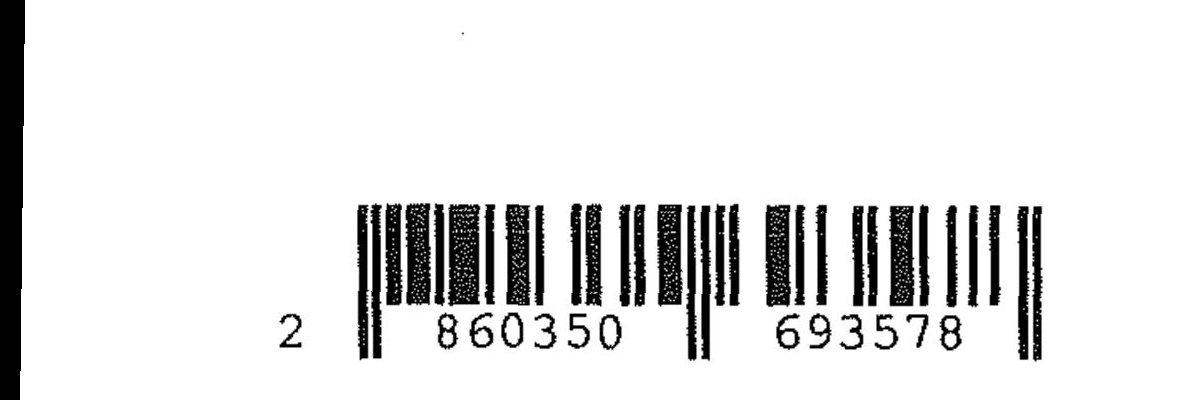

In [24]:
rotate_img

In [25]:
rotate_img.show() 

In [28]:
# image = cv.imread(str(img_path))

# img = decode(image)
# cv.imshow("Image", img)
# cv.waitKey(0)
# cv.destroyAllWindows()

[]


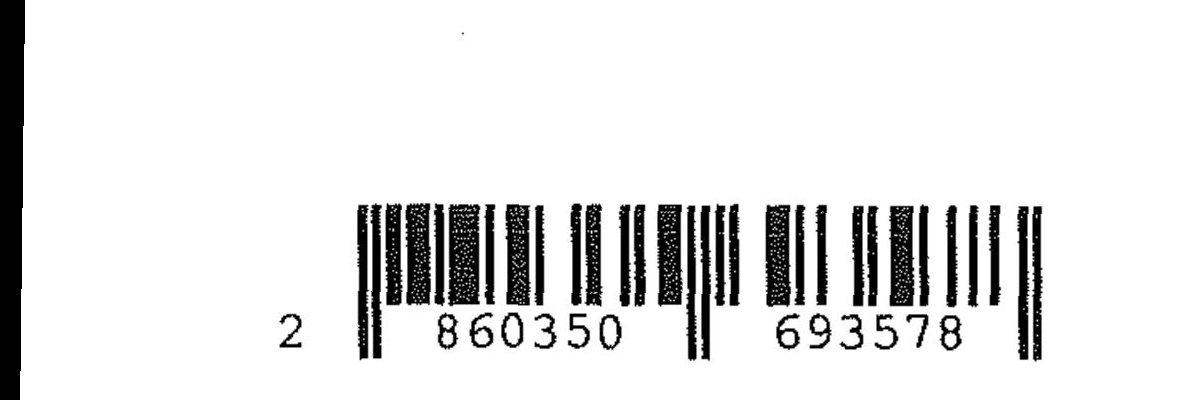

In [29]:
decode(rotate_img)

### Исследование влияния предобработки на качество определения штрих-кода

Вывод: Добавление гауссовского блюра